<div align="right"><i>Peter Norvig<br>Feb 2020</i></div>

# Predicting Presidential Electoral Votes from Approval Polls

> **NOTE**: This notebook was useful in 2018-2019, before we knew who Trump's opponent would be. Now that we know that Biden is the Democratic nominee, there are many sites tracking head-to-head polls, and **this notebook is no longer useful.**

Various sites aggregate opinion polls on presidential job performance. The polls are broken out state-by-state, month-by-month at [Mourning Consult](https://morningconsult.com/tracking-trump/) (and overall approval ratings are at [RealClearPolitics](https://www.realclearpolitics.com/epolls/other/president_trump_job_approval-6179.html),  [538](https://projects.fivethirtyeight.com/trump-approval-ratings/), and [Gallup](https://news.gallup.com/poll/203198/presidential-approval-ratings-donald-trump.aspx).  There are four big caveats in jumping from these approval numbers to conclusions about the coming election:

1. Today is not election day 2020. 

2. We don't know who will be on the ballot in 2020.

3. Approval polls are not votes. 

4. Popular votes are not electoral votes. 

I have nothing to offer on the first three points. But given these caveats, can we use state-by-state approval polls to 
predict electoral votes? ***Yes we can!*** I propose and implement a model where the president wins exactly the states in which he has a positive net approval rating.


# Details for data science nerds

View, verify, or modify **[my code](ElectoralVotesCode.ipynb)**.

# The Bottom Line

With the February 2020 approval polls, here is the number of electoral vote Trump would have expected according to the model:

In [1]:
%run ElectoralVotesCode.ipynb

EV(states) 

235

235 is 35 votes short of winning.

Now, Imagine a swing in voter approval of just 0.5% in either direction, for every state across the board. That would break ties, and we'd get a range of electoral votes: fewer in one direction, more in the other. If we allowed larger swings in approval, we'd get an even larger range. Here's how it goes:

In [2]:
show_swings()

Swing   EV Range
±0.5%  235 to 235
±1.5%  224 to 273
±2.5%  208 to 273
±3.5%  179 to 273
±4.5%  173 to 273
±5.5%  155 to 302
±6.5%  147 to 306
±7.5%  109 to 306
±8.5%   99 to 306
±9.5%   85 to 306


That is, with a swing of 1.5% in his favor in every state (or just in a few key states), Trump could win with a slim 273-265 margin, or with a 1.5% swing against him, lose by a large 224 to 314 margin.

# Details for policy wonks

# Electoral votes by month

The following plot shows, for each month in office, the expected number of electoral votes, with error bars indicating a 3% approval swing in either direction (that is: the blue diamond is the total number of electoral votes for states where he has net positive approval; the top and bottom of the grey bars give the total if he were to gain or lose 3% in every state. Why 3%? That was the [average error](https://fivethirtyeight.com/features/the-polls-are-all-right/) in national presidential polls in 2016: Clinton was predicted to win the popular vote by 6% but actually only won by 3%.) 

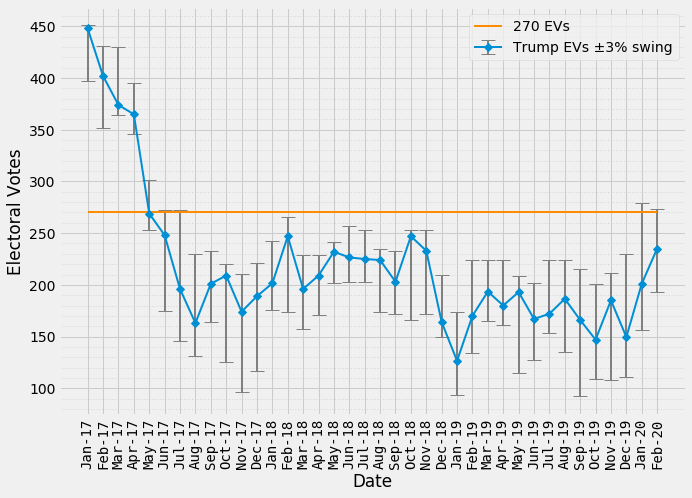

In [3]:
show_evs()

# Margin and country-wide net approval by month

The next plot gives the swing margin needed to reach 270 for each month, along with the country-wide net approval. Trump has been in negative territory on all metrics since his fourth month in office. He's been net -10% or worse country-wide every month since his third in office.  We see that the state-by-state margin roughly correlates with the country-wide net approval, but not exactly.

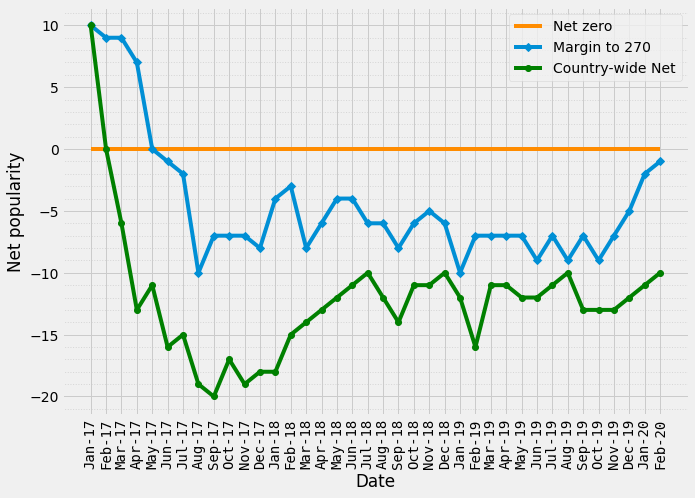

In [4]:
show_approval()

# Uncertainty

There's a lot of uncertainty. We don't know who  will be on the ballot and what their approval levels will be, we don't know if there is systematic bias in the polling data, we don't know who will decide not to vote, we don't know who will be prevented or dissuaded from voting by interference foreign or domestic, we don't know if future events will change voters' perceptions. In what follows, I assume there is no big event (or events) that makes a dramatic change in the public perception of candidates; rather, just the normal range of change in approval as tracked over the last 3 years of Trump's presidency. I have five ways of understanding the fluidity of the situation:

- **Undecided**: Undecided voters could make up their minds late in the election cycle. But there are few undecided voters: in most states, only 3% or 4%. 

- **Variance**: How much are voters changing their minds from month to month in each state?  I track the standard deviation, 𝝈, of the net approval for each state over the last 12 months (variance is the square of standard deviation).

- **Movement**: I define the **maximum expected movement** of approval as 1/5 of the undecided voters (i.e., assume the undecided voters broke 60/40 one way or the other) plus 2 standard deviations in the monthly net approval. 

- **Swing state**: I define a swing state as one whose maximum expected movement is greater than the absolute value of the net approval. There are **12** such states now.  The swing states are shown below in **BOLD CAPS**.

- **Margin**: If you list states in order of net approval, the key turning-point state is Pennsylvania; Trump would need to win that and every state in which he is more popular to reach 270. He currently is **5% behind in Pennsylvania**, so we say that his margin is just over 5%.

# State-by-state summary table

The following table packs in a lot of information. States are sorted by net approval. The columns are:

- **State**: name of state. 
- **Net**: President's current net approval in state.
- **Move**:  Expected maximum movement: 1/5 of the undecided voters  plus 2 standard deviations in the net approval over the last 12 months.
- **EV**: State's number of electoral votes.
- **ΣEV**: Cumulative running sum of electoral votes of this state and all states above.
- **+**: President's current approval in state.
- **-**: President's current disapproval in state.
- **?**: Undecideds in state.
- **𝝈**: Standard deviation in net approval over the past 12 months in state.


In [5]:
show_states()

|State|Net|Move|EV|ΣEV|+|−|?|𝝈|
|-|-|-|-|-|-|-|-|-|
|Alabama|+28%|±5%|9|9|62%|34%|4%|±2.3%
|Wyoming|+27%|±10%|3|12|62%|35%|3%|±4.8%
|West Virginia|+24%|±5%|5|17|61%|37%|2%|±2.1%
|Louisiana|+21%|±8%|8|25|59%|38%|3%|±3.7%
|Idaho|+19%|±6%|4|29|58%|39%|3%|±2.7%
|Kentucky|+17%|±4%|8|37|57%|40%|3%|±1.5%
|Tennessee|+17%|±4%|11|48|57%|40%|3%|±1.8%
|Mississippi|+14%|±7%|6|54|55%|41%|4%|±3.1%
|Oklahoma|+14%|±6%|7|61|56%|42%|2%|±2.8%
|South Carolina|+13%|±6%|9|70|55%|42%|3%|±2.5%
|Arkansas|+11%|±5%|6|76|54%|43%|3%|±2.4%
|Utah|+11%|±9%|6|82|54%|43%|3%|±4.2%
|South Dakota|+10%|±7%|3|85|54%|44%|2%|±3.4%
|Indiana|+9%|±6%|11|96|53%|44%|3%|±2.8%
|North Dakota|+9%|±6%|3|99|53%|44%|3%|±2.8%
|Missouri|+8%|±6%|10|109|52%|44%|4%|±2.4%
|Texas|+7%|±5%|38|147|52%|45%|3%|±2.0%
|**MONTANA**|**+6%**|**±7%**|3|150|52%|46%|2%|±3.2%
|**NEBRASKA**|**+6%**|**±8%**|5|155|52%|46%|2%|±3.6%
|**ALASKA**|**+5%**|**±7%**|3|158|51%|46%|3%|±3.3%
|**NORTH CAROLINA**|**+5%**|**±5%**|15|173|51%|46%|3%|±2.4%
|**KANSAS**|**+4%**|**±5%**|6|179|51%|47%|2%|±2.2%
|**FLORIDA**|**+3%**|**±4%**|29|208|50%|47%|3%|±1.7%
|**GEORGIA**|**+2%**|**±6%**|16|224|49%|47%|4%|±2.4%
|**ARIZONA**|**+1%**|**±6%**|11|235|49%|48%|3%|±2.6%
|**OHIO**|**-1%**|**±4%**|18|253|48%|49%|3%|±1.6%
|**PENNSYLVANIA**|**-1%**|**±6%**|20|273|48%|49%|3%|±2.7%
|**IOWA**|**-5%**|**±6%**|6|279|46%|51%|3%|±2.5%
|**MINNESOTA**|**-5%**|**±7%**|10|289|46%|51%|3%|±3.4%
|Virginia|-5%|±3%|13|302|46%|51%|3%|±1.4%
|**MAINE**|**-6%**|**±7%**|4|306|46%|52%|2%|±3.1%
|Delaware|-10%|±8%|3|309|43%|53%|4%|±3.8%
|Michigan|-10%|±4%|16|325|43%|53%|4%|±1.8%
|Nevada|-11%|±6%|6|331|43%|54%|3%|±2.6%
|New Mexico|-11%|±7%|5|336|43%|54%|3%|±3.0%
|Wisconsin|-11%|±5%|10|346|43%|54%|3%|±2.2%
|New Jersey|-12%|±5%|14|360|42%|54%|4%|±2.0%
|Colorado|-13%|±6%|9|369|42%|55%|3%|±2.6%
|Connecticut|-17%|±5%|7|376|40%|57%|3%|±2.2%
|Illinois|-18%|±4%|20|396|39%|57%|4%|±1.8%
|New Hampshire|-18%|±7%|4|400|40%|58%|2%|±3.2%
|Rhode Island|-18%|±4%|4|404|39%|57%|4%|±1.8%
|New York|-20%|±4%|29|433|38%|58%|4%|±1.7%
|Hawaii|-21%|±10%|4|437|38%|59%|3%|±4.7%
|Oregon|-21%|±6%|7|444|38%|59%|3%|±2.7%
|Maryland|-25%|±5%|10|454|36%|61%|3%|±2.1%
|Massachusetts|-26%|±5%|11|465|36%|62%|2%|±2.1%
|Washington|-27%|±4%|12|477|35%|62%|3%|±1.7%
|California|-28%|±3%|55|532|34%|62%|4%|±1.3%
|Vermont|-39%|±8%|3|535|29%|68%|3%|±3.9%
|District of Columbia|-57%|±6%|3|538|19%|76%|5%|±2.5%

# Popularity Above Replacement President (PARP) 

Fivethirtyeight is a combination sports/politics site, and it has a lot of statistics about sports players and how much better they are than the average replacement player. Given that, they [decided](https://fivethirtyeight.com/features/the-states-where-trump-is-more-and-less-popular-than-he-should-be/) to rate the president's approval versus each state's overall approval of the president's party (in recent elections), which is a way of rating the president's performance versus an average replacement candidate from the same party. I'll duplicate that work and keep it up to date. We define the PARP for a state as the president's net approval minus the average party-member's net approval in that state (known as the "partisan lean"). 

In the table below, states are ordered by PARP. In each row we have the state name followed by the partisan lean of the state (positive numbers lean towards the president's party), the electoral votes, and then a pair of statistics (PARP, and net approval (in parentheses)) for four time periods (today,  followed by January of 2019, 2018, and 2017). 

In [6]:
show_parp()

|State|Lean|EV|PARP|(Net)|PARP'19|(Net)|PARP'18|(Net)|PARP'17|(Net)|
|-|-|-|-|-|-|-|-|-|-|-|
|Hawaii|-36|4|+15|(-21)|+7|(-29)|+0|(-36)|+23|(-13)|
|Rhode Island|-26|4|+8|(-18)|+7|(-19)|+4|(-22)|+22|(-4)|
|Delaware|-14|3|+4|(-10)|-1|(-15)|+0|(-14)|+22|(+8)|
|Louisiana|+17|8|+4|(+21)|-2|(+15)|+2|(+19)|+14|(+31)|
|Massachusetts|-29|11|+3|(-26)|-2|(-31)|-3|(-32)|+25|(-4)|
|New York|-22|29|+2|(-20)|-2|(-24)|+4|(-18)|+30|(+8)|
|Alabama|+27|9|+1|(+28)|-7|(+20)|+3|(+30)|+9|(+36)|
|New Jersey|-13|14|+1|(-12)|-6|(-19)|-3|(-16)|+15|(+2)|
|**NORTH CAROLINA**|+5|15|+0|(+5)|-9|(-4)|-6|(-1)|+13|(+18)|
|**MAINE**|-5|4|-1|(-6)|-6|(-11)|-11|(-16)|+13|(+8)|
|Mississippi|+15|6|-1|(+14)|-2|(+13)|+2|(+17)|+19|(+34)|
|**FLORIDA**|+5|29|-2|(+3)|-9|(-4)|+0|(+5)|+17|(+22)|
|Maryland|-23|10|-2|(-25)|-7|(-30)|+0|(-23)|+10|(-13)|
|**PENNSYLVANIA**|+1|20|-2|(-1)|-11|(-10)|-4|(-3)|+9|(+10)|
|**MINNESOTA**|-2|10|-3|(-5)|-16|(-18)|-12|(-14)|+5|(+3)|
|California|-24|55|-4|(-28)|-6|(-30)|+1|(-23)|+18|(-6)|
|New Mexico|-7|5|-4|(-11)|-11|(-18)|-13|(-20)|+24|(+17)|
|South Carolina|+17|9|-4|(+13)|-9|(+8)|-10|(+7)|+8|(+25)|
|Illinois|-13|20|-5|(-18)|-10|(-23)|-8|(-21)|+22|(+9)|
|Virginia|+0|13|-5|(-5)|-10|(-10)|-4|(-4)|+8|(+8)|
|Connecticut|-11|7|-6|(-17)|-13|(-24)|-8|(-19)|+16|(+5)|
|Kentucky|+23|8|-6|(+17)|-9|(+14)|-8|(+15)|+11|(+34)|
|West Virginia|+30|5|-6|(+24)|-6|(+24)|-8|(+22)|+7|(+37)|
|**ARIZONA**|+9|11|-8|(+1)|-17|(-8)|-12|(-3)|+11|(+20)|
|**OHIO**|+7|18|-8|(-1)|-13|(-6)|-11|(-4)|+7|(+14)|
|Indiana|+18|11|-9|(+9)|-14|(+4)|-17|(+1)|+4|(+22)|
|Michigan|-1|16|-9|(-10)|-14|(-15)|-9|(-10)|+9|(+8)|
|**ALASKA**|+15|3|-10|(+5)|-14|(+1)|-14|(+1)|+9|(+24)|
|**GEORGIA**|+12|16|-10|(+2)|-14|(-2)|-5|(+7)|+6|(+18)|
|Texas|+17|38|-10|(+7)|-17|(+0)|-10|(+7)|+3|(+20)|
|**IOWA**|+6|6|-11|(-5)|-20|(-14)|-16|(-10)|+3|(+9)|
|Missouri|+19|10|-11|(+8)|-21|(-2)|-17|(+2)|+0|(+19)|
|Tennessee|+28|11|-11|(+17)|-16|(+12)|-11|(+17)|+5|(+33)|
|Colorado|-1|9|-12|(-13)|-17|(-18)|-13|(-14)|+2|(+1)|
|**MONTANA**|+18|3|-12|(+6)|-17|(+1)|-18|(+0)|+6|(+24)|
|Nevada|+1|6|-12|(-11)|-14|(-13)|-2|(-1)|+9|(+10)|
|Oregon|-9|7|-12|(-21)|-13|(-22)|-11|(-20)|+11|(+2)|
|Wisconsin|+1|10|-12|(-11)|-17|(-16)|-13|(-12)|+5|(+6)|
|Arkansas|+24|6|-13|(+11)|-14|(+10)|-11|(+13)|+6|(+30)|
|District of Columbia|-43|3|-14|(-57)|-22|(-65)|-21|(-64)|+12|(-31)|
|Vermont|-24|3|-15|(-39)|-11|(-35)|-12|(-36)|+22|(-2)|
|Washington|-12|12|-15|(-27)|-14|(-26)|-11|(-23)|+13|(+1)|
|Idaho|+35|4|-16|(+19)|-20|(+15)|-24|(+11)|-6|(+29)|
|**NEBRASKA**|+24|5|-18|(+6)|-24|(+0)|-18|(+6)|-1|(+23)|
|**KANSAS**|+23|6|-19|(+4)|-22|(+1)|-18|(+5)|+1|(+24)|
|New Hampshire|+2|4|-20|(-18)|-21|(-19)|-12|(-10)|-1|(+1)|
|Oklahoma|+34|7|-20|(+14)|-24|(+10)|-19|(+15)|+0|(+34)|
|Utah|+31|6|-20|(+11)|-37|(-6)|-34|(-3)|-4|(+27)|
|Wyoming|+47|3|-20|(+27)|-17|(+30)|-22|(+25)|-7|(+40)|
|South Dakota|+31|3|-21|(+10)|-25|(+6)|-21|(+10)|-10|(+21)|
|North Dakota|+33|3|-24|(+9)|-29|(+4)|-22|(+11)|-10|(+23)|

# Electoral Vote Totals

Sites that simulate elections show electoral vote histograms that are spiky: some electoral vote totals are very common,others uncommon. I wanted to know if every total was possible. It turns out the answer is yes:

In [7]:
show_totals()

  0 []
  1 [Maine-1]
  2 [Maine-1 + Maine-2]
  3 [Alaska]
  4 [Hawaii]
  5 [Nebraska]
  6 [Arkansas]
  7 [Connecticut]
  8 [Kentucky]
  9 [Alabama]
 10 [Maryland]
 11 [Arizona]
 12 [Washington]
 13 [Virginia]
 14 [New Jersey]
 15 [North Carolina]
 16 [Georgia]
 17 [Kentucky + Alabama]
 18 [Ohio]
 19 [Alabama + Maryland]
 20 [Illinois]
 21 [Maryland + Arizona]
 22 [Arizona + Indiana]
 23 [Arizona + Washington]
 24 [Arizona + Virginia]
 25 [Washington + Virginia]
 26 [Washington + New Jersey]
 27 [Virginia + New Jersey]
 28 [Virginia + North Carolina]
 29 [Florida]
 30 [New Jersey + Georgia]
 31 [North Carolina + Georgia]
 32 [Georgia + Michigan]
 33 [North Carolina + Ohio]
 34 [Georgia + Ohio]
 35 [North Carolina + Illinois]
 36 [Georgia + Illinois]
 37 [Kentucky + Florida]
 38 [Texas]
 39 [Maryland + Florida]
 40 [Illinois + Pennsylvania]
 41 [Washington + Florida]
 42 [Virginia + Florida]
 43 [New Jersey + Florida]
 44 [North Carolina + Florida]
 45 [Georgia + Florida]
 46 [Kentucky +

For total number of votes *v* where 270 ≤ *v* ≤ 538, the answer is "all the states except the ones listed for (538 - *v*)".